# Week 7 Assignment

Objective: 
- Introduce race demographic data to ongoing gentrification analysis and implement function and loop into code.
- Begin analysis of City of Los Angeles' "Adequate Sites Inventory" scope in Chinatown

## Part 1: Los Angeles Chinatown Demographic Analysis Using the Aerican Community Survey (ACS)


<div class="alert alert-info">
Start by importing modules to gain access to their functions for data analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

Read and add 2020 Census Data for Los Angeles County at the block group level:

In [2]:
# Read and add csv as 'census_race'.
census2020_race = pd.read_csv('Data/Census 2020 (Redistricting Data) - Race.csv',
                              dtype = {
                                  'Geo_FIPS':str,
                                  'Geo_STATE':str,
                                  'Geo_COUNTY':str }
                             )

In [3]:
census2020_race.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_CT,Geo_BG,Geo_PLACE,...,SE_T026_007,SE_T026_008,SE_T027_000,SE_T027_002,SE_T027_003,SE_T027_004,SE_T027_005,SE_T027_006,SE_T027_007,SE_T027_008
0,060371011101,Block Group 1,"Block Group 1, Census Tract 1011.10, Los Angel...",0,06,037,NaN,101110,1,NaN,...,36.170213,71.698113,-2.220446e-15,-6.055618,-0.133062,0.323403,-1.448426,0.144335,3.674764,3.494605
1,060371011102,Block Group 2,"Block Group 2, Census Tract 1011.10, Los Angel...",0,06,037,NaN,101110,2,NaN,...,11.929825,238.157895,5.329071e-15,-9.456073,-0.525116,0.697780,-1.253772,0.209120,0.956657,9.371404
2,060371011103,Block Group 3,"Block Group 3, Census Tract 1011.10, Los Angel...",0,06,037,NaN,101110,3,NaN,...,-5.454545,85.454545,2.664535e-15,-2.535188,0.194776,0.295786,-1.753809,-0.103908,-0.765441,4.667784
3,060371011221,Block Group 1,"Block Group 1, Census Tract 1011.22, Los Angel...",0,06,037,NaN,101122,1,NaN,...,36.781609,128.235294,8.881784e-16,-3.055714,-0.086597,0.261097,-3.255139,0.000000,1.393555,4.742799
4,060371011222,Block Group 2,"Block Group 2, Census Tract 1011.22, Los Angel...",0,06,037,NaN,101122,2,NaN,...,31.428571,98.550725,2.664535e-15,-4.744566,0.326552,0.533154,-1.876402,-0.073314,1.306104,4.528473


### Cleaning the Data

#### **Los Angeles Chinatown Geography - Block Groups**

Importing the dataset:

In [4]:
# Import Los Angeles Neighborhood Boundaries dataset
la_neighborhoods = gpd.read_file('Data/LA_Times_Neighborhood_Boundaries.zip')
la_neighborhoods.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


In [5]:
# Filter dataset to get Chinatown geometry
la_chinatown = la_neighborhoods[la_neighborhoods['name'] == 'Chinatown']
la_chinatown

,OBJECTID,name,geometry
20,21,Chinatown,"POLYGON ((-118.22473 34.06758, -118.22703 34.0..."


In [6]:
# Import census block group geography
census_block_groups_2020 = gpd.read_file('Data/tl_2020_06_bg.zip')

In [7]:
census_block_groups_2020.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,053,001500,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
1,06,073,002712,2,060730027122,Block Group 2,G5030,S,337744,0,+32.7303521,-117.0787620,"POLYGON ((-117.08306 32.72588, -117.08280 32.7..."
2,06,073,018601,2,060730186012,Block Group 2,G5030,S,886725,0,+33.2295683,-117.3482855,"POLYGON ((-117.35296 33.22489, -117.35294 33.2..."
3,06,073,018609,3,060730186093,Block Group 3,G5030,S,379311,0,+33.2495250,-117.3148675,"POLYGON ((-117.31819 33.25084, -117.31819 33.2..."
4,06,073,019406,3,060730194063,Block Group 3,G5030,S,649440,0,+33.2018708,-117.2686502,"POLYGON ((-117.27370 33.19762, -117.27367 33.1..."


<AxesSubplot: >

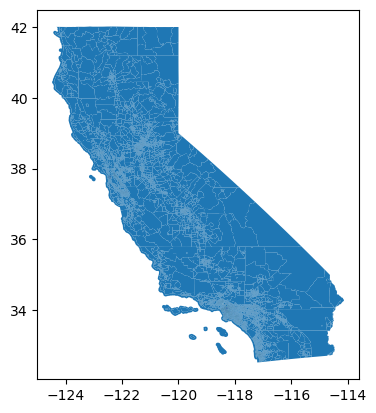

In [8]:
census_block_groups_2020.plot()

Getting Chinatown's census census block groups:

In [9]:
# Extract census block groups within Chinatown
chinatown_bg = gpd.clip(census_block_groups_2020, la_chinatown)

chinatown_geo_keep = ['GEOID', 'INTPTLAT', 'INTPTLON', 'geometry']

# Update new dataframe to includes desired columns
chinatown_bg = chinatown_bg[chinatown_geo_keep]

/tmp/ipykernel_1121/1217736470.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  chinatown_bg = gpd.clip(census_block_groups_2020, la_chinatown)
/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [10]:
chinatown_bg

,GEOID,INTPTLAT,INTPTLON,geometry
13260,060372060201,+34.0571230,-118.2311021,"POLYGON ((-118.23692 34.05880, -118.23678 34.0..."
23707,060372071021,+34.0592851,-118.2395097,"POLYGON ((-118.24115 34.05906, -118.24134 34.0..."
15094,060372071012,+34.0603157,-118.2450677,"MULTIPOLYGON (((-118.24389 34.06063, -118.2439..."
23706,060372071011,+34.0625255,-118.2444447,"POLYGON ((-118.24732 34.06383, -118.24706 34.0..."
6983,060372071032,+34.0644499,-118.2386266,"POLYGON ((-118.24381 34.06386, -118.24367 34.0..."
13259,060372060102,+34.0640019,-118.2289441,"POLYGON ((-118.23461 34.06206, -118.23410 34.0..."
10236,060372071031,+34.0646919,-118.2434341,"POLYGON ((-118.24546 34.06473, -118.24522 34.0..."
11175,060371976001,+34.0659405,-118.2511285,"POLYGON ((-118.24921 34.06520, -118.24920 34.0..."
13536,060371977002,+34.0656960,-118.2466858,"POLYGON ((-118.24579 34.06690, -118.24415 34.0..."
13537,060371977003,+34.0683153,-118.2427034,"POLYGON ((-118.24564 34.07098, -118.24206 34.0..."


Plot census block groups in Chinatown:

<AxesSubplot: >

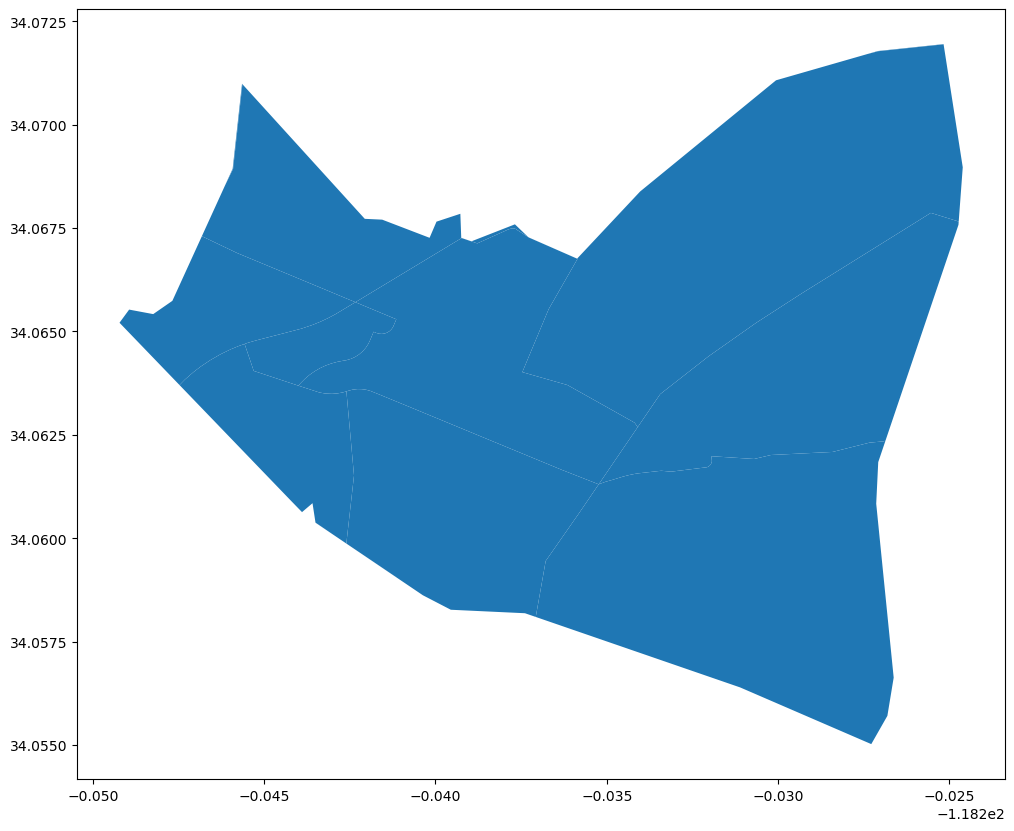

In [11]:
chinatown_bg.plot(figsize=(12,10))

Get list of all census block groups in Chinatown:

In [12]:
# Chinatown block groups
chinatown_bg_list = chinatown_bg['GEOID'].tolist()
chinatown_bg_list

['060372060201',
 '060372071021',
 '060372071012',
 '060372071011',
 '060372071032',
 '060372060102',
 '060372071031',
 '060371976001',
 '060371977002',
 '060371977003',
 '060371977001',
 '060372060101',
 '060379800101']

#### **Race Percentage Change - 2010 to 2020**

Tracking race changes (%) per group as identified in the dataset:

In [13]:
# Create new dataframe to clean the original dataset
race_percentage_change_2020 = census2020_race

# List columns to keep - 'Race Change 2010 to 2020 Percentage'

columns_to_keep = ['Geo_FIPS',
                   'SE_T026_000',
                   'SE_T026_002',
                   'SE_T026_003',
                   'SE_T026_004',
                   'SE_T026_005',
                   'SE_T026_006',
                   'SE_T026_007',
                   'SE_T026_008']

# Update new dataframe to includes desired columns
race_percentage_change_2020 = race_percentage_change_2020[columns_to_keep]

# Renaming columns
race_percentage_change_2020.columns = ['GEOID',
                                       'Total Population Change Percent',
                                       'White Change Percent',
                                       'African American or Black Change Percent',
                                       'American Indian and Alaska Native Change Percent',
                                       'Asian Change Percent',
                                       'Native Hawaiian and Other Pacific Islander Change Percent',
                                       'Other Change Percent',
                                       'Two or More Races Change Percent']
                                       

In [14]:
# Check updated dataframe
race_percentage_change_2020.head()

,GEOID,Total Population Change Percent,White Change Percent,African American or Black Change Percent,American Indian and Alaska Native Change Percent,Asian Change Percent,Native Hawaiian and Other Pacific Islander Change Percent,Other Change Percent,Two or More Races Change Percent
0,060371011101,4.113763,-4.823614,-2.380952,77.777778,-11.764706,300.0,36.170213,71.698113
1,060371011102,5.599104,-9.682948,-23.529412,93.333333,-5.769231,400.0,11.929825,238.157895
2,060371011103,1.434426,-2.130682,40.000000,60.000000,-16.842105,-50.0,-5.454545,85.454545
3,060371011221,-0.043478,-4.120720,-9.523810,100.000000,-19.841270,NaN,36.781609,128.235294
4,060371011222,4.765396,-1.471941,71.428571,100.000000,-17.213115,-100.0,31.428571,98.550725


Combining race changes data to geometry:

In [15]:
# Merge race change information to Chinatown block groups
chinatown_race_change = chinatown_bg.merge(race_percentage_change_2020, on='GEOID')

In [16]:
# Check new dataframe
chinatown_race_change.head()

,GEOID,INTPTLAT,INTPTLON,geometry,Total Population Change Percent,White Change Percent,African American or Black Change Percent,American Indian and Alaska Native Change Percent,Asian Change Percent,Native Hawaiian and Other Pacific Islander Change Percent,Other Change Percent,Two or More Races Change Percent
0,060372060201,+34.0571230,-118.2311021,"POLYGON ((-118.23692 34.05880, -118.23678 34.0...",-29.252823,-69.256653,-38.643166,-87.500000,-13.928571,-60.0,107.349081,-19.685039
1,060372071021,+34.0592851,-118.2395097,"POLYGON ((-118.24115 34.05906, -118.24134 34.0...",32.158245,32.326284,163.043478,241.176471,3.595506,500.0,95.189003,431.707317
2,060372071012,+34.0603157,-118.2450677,"MULTIPOLYGON (((-118.24389 34.06063, -118.2439...",5.707932,-2.179837,126.612903,700.000000,-35.977337,100.0,121.250000,110.000000
3,060372071011,+34.0625255,-118.2444447,"POLYGON ((-118.24732 34.06383, -118.24706 34.0...",6.419317,121.428571,368.000000,600.000000,-23.949580,NaN,100.000000,331.250000
4,060372071032,+34.0644499,-118.2386266,"POLYGON ((-118.24381 34.06386, -118.24367 34.0...",11.773819,57.471264,877.777778,75.000000,-12.739965,300.0,219.444444,1050.000000


### Adding a function and a loop

Identify racial groups we want to track and add to a list:

In [17]:
race_list = ['Total Population Change Percent',
        'White Change Percent',
        'African American or Black Change Percent',
        'American Indian and Alaska Native Change Percent',
        'Asian Change Percent',
        'Native Hawaiian and Other Pacific Islander Change Percent',
        'Other Change Percent',
        'Two or More Races Change Percent']

Create a function that takes each group in the list and output a map using block group geometries to represent race changes:

In [18]:
def race_change_map(race):
    race_change_map = folium.Map(location = [34.0623, -118.2383], tiles = 'OpenStreetMap', zoom_start = 15) # Chinatown coordinates from Google
    folium.Choropleth(geo_data = chinatown_race_change,
                      data = chinatown_race_change,
                      columns = ['GEOID', race],
                      key_on = 'feature.properties.GEOID',
                      fill_color = 'BuPu',
                      line_weight=0.1, 
                      fill_opacity=0.8,
                      line_opacity=0.2,
                      legend_name = race).add_to(race_change_map)
    display(race_change_map)


Use a for loop to iterate through the list of racial groups and perform the created function to each group to eventually yield many maps:

In [19]:
for race in race_list:
    race_change_map(race)

This data shows the greatest increases in all groups but Asians and the greatest decrease in Asians in the defined Chinatown boundaries. 

## Part 2: Analyzing Future Development in Chinatown

### What does the most recent Housing Element tell us about plans to develop Chinatown to reach their RHNA goals?

In meeting their allocated Regional Housing Needs Assessment (RHNA) housing goals, local governments are planning strategies to further housing development where development opportunities are inhibited by land use and zoning regulations. 

The City of Los Angeles must accomodate a total of **456,643 units**, of which only **184,721 units must be afforable to lower income households.** Thus, the City has identified "Adeuqate Sites" that have been "assigned an anticipated development potential ("realistic capacity") that is well below the maximum allowable number of units for the site" which may be viewed [here](https://storymaps.arcgis.com/stories/59a896a0931346a7a94acbf9917f90b7). In other words, these sites have been identified for being "underutilized" per their designated zoning and is *not* built to their maximum capacity.

**How does this impact Los Angeles Chinatown?** Will development be distributed equitably? Will areas with large populations of low-income and people of color like Los Angeles Chinatown face the burden of greater development in their neighborhoods in the name of more housing despite the history of disinvestment in these communities?

This notebook seeks to explore "Adequate Sites" and future rezoned sites in Chinatown.

<div class="alert alert-info">
Import Chinatown Parcels (2021) for mapping.

In [2]:
# Read and add Chinatown parcels as 'chinatown_parcels'
chinatown_parcels = gpd.read_file('data/Assessor_Parcels_Data_2021_TRA.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
chinatown_parcels.head()

,OBJECTID_1,AIN,APN,SitusHouse,SitusFract,SitusDirec,SitusUnit,SitusStree,SitusAddre,SitusCity,...,StreetDirection,StreetName,UnitNo,City,ZIPcode5,rowID,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry
0,1245695.0,5414007015,5414-007-015,999,None,N,None,BROADWAY,999 N BROADWAY,LOS ANGELES CA,...,N,BROADWAY,None,LOS ANGELES CA,90012.0,20215414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118...."
1,1244222.0,5406028127,5406-028-127,918,None,W,317,COLLEGE ST,918 W COLLEGE ST 317,LOS ANGELES CA,...,W,COLLEGE ST,317,LOS ANGELES CA,90012.0,20215406028127,34.066384,-118.245256,"(34.06638387, -118.2452556)","POLYGON Z ((-118.24515 34.06608 0.00000, -118...."
2,1244952.0,5409016030,5409-016-030,908,None,None,None,AVILA ST,908 AVILA ST,LOS ANGELES CA,...,None,AVILA ST,None,LOS ANGELES CA,90012.0,20215409016030,34.057580,-118.232624,"(34.05758025, -118.23262425)","POLYGON Z ((-118.23247 34.05774 0.00000, -118...."
3,1244337.0,5407007040,5407-007-040,716,None,None,A,NEW DEPOT ST,716 NEW DEPOT ST A,LOS ANGELES CA,...,None,NEW DEPOT ST,A,LOS ANGELES CA,90012.0,20215407007040,34.064934,-118.242593,"(34.06493449, -118.24259269)","POLYGON Z ((-118.24270 34.06474 0.00000, -118...."
4,1244506.0,5407022001,5407-022-001,734,None,N,None,HILL PL,734 N HILL PL,LOS ANGELES CA,...,N,HILL PL,None,LOS ANGELES CA,90012.0,20215407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118...."


In [4]:
# Cleaning
columns_to_keep = ['AIN','CENTER_LAT_y', 'CENTER_LON_y', 'Location 1', 'geometry']
chinatown_parcels = chinatown_parcels[columns_to_keep]

In [5]:
# Get preview of dataset.
chinatown_parcels.head()

,AIN,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry
0,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118...."
1,5406028127,34.066384,-118.245256,"(34.06638387, -118.2452556)","POLYGON Z ((-118.24515 34.06608 0.00000, -118...."
2,5409016030,34.057580,-118.232624,"(34.05758025, -118.23262425)","POLYGON Z ((-118.23247 34.05774 0.00000, -118...."
3,5407007040,34.064934,-118.242593,"(34.06493449, -118.24259269)","POLYGON Z ((-118.24270 34.06474 0.00000, -118...."
4,5407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118...."


<AxesSubplot: >

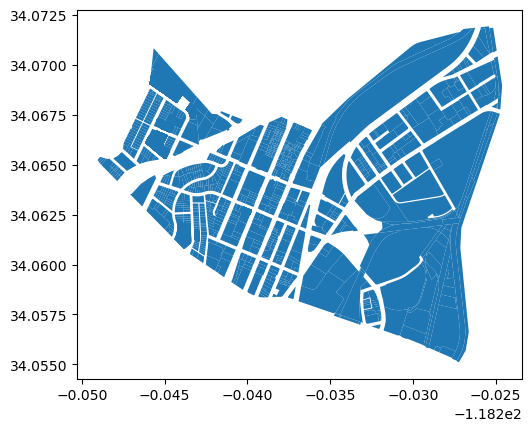

In [6]:
# Plot Chinatown parcels
chinatown_parcels.plot()

### **Appendix 4.1 - Inventory of Adequate Sites for Housing (Table A)**

According to the County of Los Angeles' most recent Housing Element, the Sites Inventory (Appendix A) is **"comprised of vacant and underutilized sites within unincorporated Los Angeles County that are zoned at appropriate densities and development standards to facilitate housing development."**

*Where are these sites in Chinatown?*

In [7]:
# Read and add excel file containing "Adequate Sites Inventory" from Appendix A
adequate_sites = pd.read_excel('data/Appendix 4.1 - Table A.xlsx')


In [8]:
adequate_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198113 entries, 0 to 198112
Data columns (total 30 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Jurisdiction Name                              198113 non-null  object 
 1   Site Address/Intersection                      175625 non-null  object 
 2   5 Digit ZIP Code                               175625 non-null  float64
 3   Assessor Parcel Number                         198113 non-null  object 
 4   Consolidated Sites                             0 non-null       float64
 5   General Plan Designation (Current)             198097 non-null  object 
 6   Zoning Designation (Current)                   198113 non-null  object 
 7   Minimum Density Allowed (units/acre)           198113 non-null  int64  
 8   Max Density Allowed (units/acre)               197444 non-null  object 
 9   Parcel Size (Acres)                  

In [9]:
# Rename 'Assessor Parcel Number' column to 'AIN'
adequate_sites = adequate_sites.rename(columns={ 'Assessor Parcel Number':'AIN'})



In [10]:
# Cleaning the data
adequate_sites_columns = ['Site Address/Intersection',
                          'AIN',
                        'Existing Use/Vacancy',
                         'Community Plan Area',
                         'Income Category']
adequate_sites = adequate_sites[adequate_sites_columns]

In [11]:
# Preview dataset
adequate_sites.head()

,Site Address/Intersection,AIN,Existing Use/Vacancy,Community Plan Area,Income Category
0,12716 W FOOTHILL BLVD,2514005032,Residential - Single Family Residence,Arleta - Pacoima,Moderate
1,12708 W FOOTHILL BLVD,2514005033,Commercial - Office Building - One Story,Arleta - Pacoima,Moderate
2,12700 W FOOTHILL BLVD,2514005034,Industrial - Light Manufacturing - One Story,Arleta - Pacoima,Moderate
3,NaN,2514005046,Residential - Single Family Residence - Vacant...,Arleta - Pacoima,Above Moderate
4,12680 W FOOTHILL BLVD,2514005050,"Commercial - Auto, Recreation Equipment, Const...",Arleta - Pacoima,Moderate


In [47]:
# Merge dataset with Chinatown parcels to identify adequate sites in Chinatown
adequate_sites_chinatown = chinatown_parcels.merge(adequate_sites, on='AIN')

In [48]:
adequate_sites_chinatown.head()

,AIN,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry,Site Address/Intersection,Existing Use/Vacancy,Community Plan Area,Income Category
0,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118....",995 N BROADWAY,Commercial - Hotel and Motel - Motel - Under 5...,Central City North,Lower
1,5407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118....",736 N HILL PL,"Residential - Double, Duplex, or Two Units - 4...",Central City North,Above Moderate
2,5414011006,34.065057,-118.238162,"(34.06505727, -118.23816209)","POLYGON Z ((-118.23809 34.06499 0.00000, -118....",NaN,Commercial - Parking Lot (Commercial Use Prope...,Central City North,Above Moderate
3,5407008008,34.065244,-118.241768,"(34.06524428, -118.24176845)","POLYGON Z ((-118.24161 34.06537 0.00000, -118....",710 W COLLEGE ST,Residential - Five or More Units or Apartments...,Central City North,Above Moderate
4,5407008008,34.065244,-118.241768,"(34.06524428, -118.24176845)","POLYGON Z ((-118.24161 34.06537 0.00000, -118....",NaN,Residential - Five or More Units or Apartments...,Central City North,Lower


In [49]:
adequate_sites_chinatown.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   AIN                        1168 non-null   object  
 1   CENTER_LAT_y               1167 non-null   float64 
 2   CENTER_LON_y               1167 non-null   float64 
 3   Location 1                 1167 non-null   object  
 4   geometry                   1168 non-null   geometry
 5   Site Address/Intersection  755 non-null    object  
 6   Existing Use/Vacancy       1168 non-null   object  
 7   Community Plan Area        1168 non-null   object  
 8   Income Category            1168 non-null   object  
dtypes: float64(2), geometry(1), object(6)
memory usage: 91.2+ KB


<AxesSubplot: >

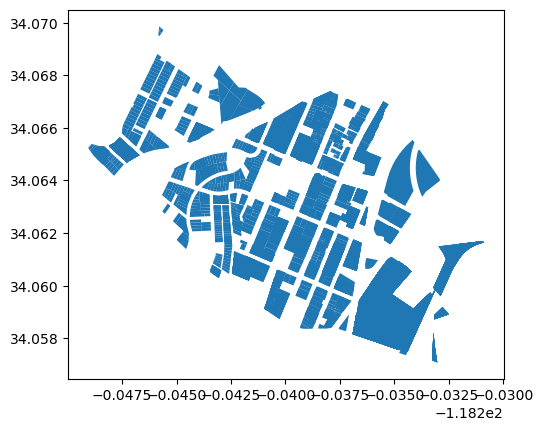

In [50]:
adequate_sites_chinatown.plot()

Compared to the original Chinatown parcels...

<AxesSubplot: >

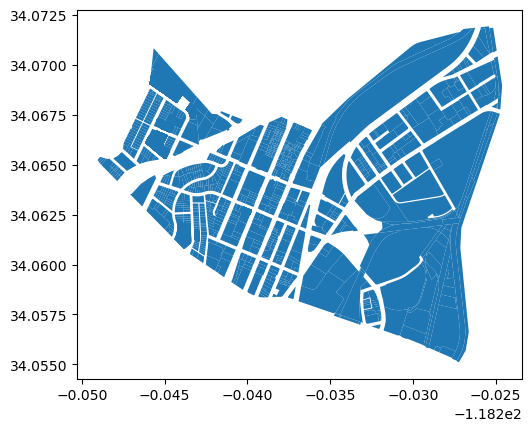

In [15]:
chinatown_parcels.plot()

This comparison shows that most sites in Chinatown have been identified as being underutilized and could become target to future policy interventions encouraging development of housing (most likely market rate) in the area.

### **Appendix 4.7 - Candidate Sites Identified to be Rezoned to Accomodate Housing Shortfall Need (Table B)**

In [35]:
# Read and add excel file containing candidate sites for rezoning
rezone_sites = pd.read_excel('data/Appendix 4.7 - Table B.xlsx',
                             dtype = {
                                  'Assessor Parcel Number':str})


In [36]:
# Rename 'Assessor Parcel Number' column to 'AIN'
rezone_sites = rezone_sites.rename(columns={ 'Assessor Parcel Number':'AIN'})

# Cleaning the data
rezone_sites_columns = ['Site Address/Intersection',
                          'AIN',
                        'Description of Existing Uses',
                         'Community Plan Area',
                         'Income Category']
rezone_sites = rezone_sites[rezone_sites_columns]

In [37]:
rezone_sites.head()

,Site Address/Intersection,AIN,Description of Existing Uses,Community Plan Area,Income Category
0,1601 E OLYMPIC BLVD,5146009006,"Industrial - Warehousing, Distribution, Storag...",Central City,ABMI
1,777 S ALAMEDA ST,5146009008,Commercial - Store Combination - Store and Off...,Central City,ABMI
2,17941 CHATSWORTH ST,2715025055,"Commercial - Restaurant, Cocktail Lounge - Fas...",Granada Hills - Knollwood,ABMI
3,0,5133029905,"Miscellaneous - Government Owned Property, 0",Central City,ABMI
4,18000 CHATSWORTH ST,2731008023,"Commercial - Office Building - One Story, 0",Granada Hills - Knollwood,ABMI


In [38]:
# Merge dataset with Chinatown parcels to identify adequate sites in Chinatown
rezone_sites_chinatown = chinatown_parcels.merge(rezone_sites, on='AIN')

In [39]:
rezone_sites_chinatown.head()

,AIN,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry,Site Address/Intersection,Description of Existing Uses,Community Plan Area,Income Category
0,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118....",999 N BROADWAY,Commercial - Hotel and Motel - Motel - Under 5...,Central City North,"VLI, LI, ABMI"
1,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118....",999 N BROADWAY,Commercial - Hotel and Motel - Motel - Under 5...,Central City North,"VLI, LI, ABMI"
2,5407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118....",734 N HILL PL,"Residential - Double, Duplex, or Two Units - 4...",Central City North,ABMI
3,5414011006,34.065057,-118.238162,"(34.06505727, -118.23816209)","POLYGON Z ((-118.23809 34.06499 0.00000, -118....",0,Commercial - Parking Lot (Commercial Use Prope...,Central City North,ABMI
4,5407008008,34.065244,-118.241768,"(34.06524428, -118.24176845)","POLYGON Z ((-118.24161 34.06537 0.00000, -118....",714 W COLLEGE ST,Residential - Five or More Units or Apartments...,Central City North,ABMI


<AxesSubplot: >

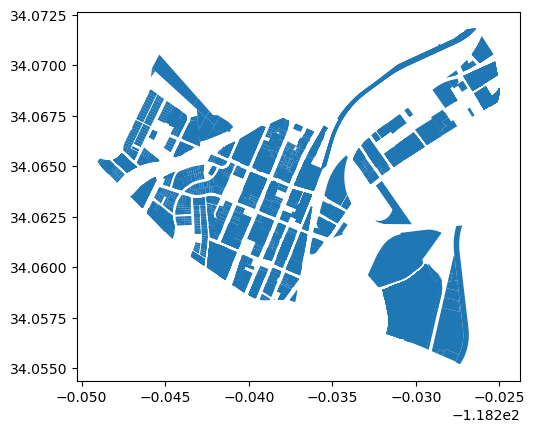

In [46]:
# Plotting candidate sites for rezoning
rezone_sites_chinatown.plot()

Compared to the original Chinatown parcels...

<AxesSubplot: >

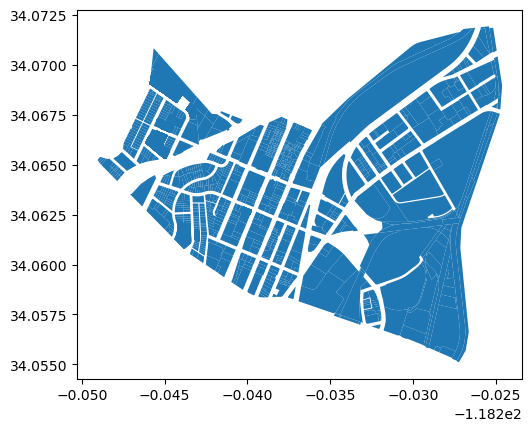

In [41]:
chinatown_parcels.plot()

This comparison shows that most of Chinatown may be considered for rezoning -- or policy implementation incentivizing development in the neighborhood.